# Shoreline Evolution

## Load data

In [2]:
import pandas as pd

# Read the .xyz file (space or tab delimited)
df = pd.read_csv('data/06_tx_1965-2023_jrk.xyz', delim_whitespace=True, names=['x', 'y', 'z'])

df

C:\Users\Move\AppData\Local\Temp\ipykernel_26616\3245929879.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('data/06_tx_1965-2023_jrk.xyz', delim_whitespace=True, names=['x', 'y', 'z'])
C:\Users\Move\AppData\Local\Temp\ipykernel_26616\3245929879.py:4: DtypeWarning: Columns (0,1,2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/06_tx_1965-2023_jrk.xyz', delim_whitespace=True, names=['x', 'y', 'z'])


x         y     z
X         Y             Z         T   loc
109682.41 558181.19  3.77  5-8-1965   900
109677.53 558180.09  3.63  5-8-1965   900
109672.65 558179.00  3.55  5-8-1965   900
109667.77 558177.91  3.41  5-8-1965   900
...                   ...       ...   ...
117558.08 579018.26 -1.44  3-4-2023  3081
117551.46 579025.77  -1.7  3-4-2023  3081
117544.85 579033.27 -1.88  3-4-2023  3081
117538.24 579040.77 -2.14  3-4-2023  3081
117531.63 579048.27 -2.21  3-4-2023  3081

[1380684 rows x 3 columns]

In [3]:
# print shape and info
print(df.shape)
print(df.info())

(1380684, 3)
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1380684 entries, ('X', 'Y') to (117531.63, 579048.27)
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   x       1380684 non-null  object
 1   y       1380684 non-null  object
 2   z       1380684 non-null  object
dtypes: object(3)
memory usage: 51.9+ MB
None


## Preprocess the data

In [4]:
# remove column names and use the first row as headers
df.columns = df.iloc[0]
df = df[1:]

In [5]:
df

('X', 'Y')              Z         T   loc
109682.41 558181.19  3.77  5-8-1965   900
109677.53 558180.09  3.63  5-8-1965   900
109672.65 558179.00  3.55  5-8-1965   900
109667.77 558177.91  3.41  5-8-1965   900
109662.89 558176.82  3.16  5-8-1965   900
...                   ...       ...   ...
117558.08 579018.26 -1.44  3-4-2023  3081
117551.46 579025.77  -1.7  3-4-2023  3081
117544.85 579033.27 -1.88  3-4-2023  3081
117538.24 579040.77 -2.14  3-4-2023  3081
117531.63 579048.27 -2.21  3-4-2023  3081

[1380683 rows x 3 columns]

In [6]:
df.columns

Index(['Z', 'T', 'loc'], dtype='object', name=('X', 'Y'))

In [7]:
df.index

MultiIndex([('109682.41', '558181.19'),
            ('109677.53', '558180.09'),
            ('109672.65', '558179.00'),
            ('109667.77', '558177.91'),
            ('109662.89', '558176.82'),
            ('109658.01', '558175.73'),
            ('109653.13', '558174.64'),
            ('109648.25', '558173.55'),
            ('109643.37', '558172.46'),
            ('109638.49', '558171.37'),
            ...
            (  117591.14,   578980.76),
            (  117584.53,   578988.26),
            (  117577.92,   578995.76),
            (   117571.3,   579003.26),
            (  117564.69,   579010.76),
            (  117558.08,   579018.26),
            (  117551.46,   579025.77),
            (  117544.85,   579033.27),
            (  117538.24,   579040.77),
            (  117531.63,   579048.27)],
           length=1380683)

In [8]:
# find number of rows with similar x and y values (index)
df.index.value_counts()

117800.0   576066.0     84
109573.0   559111.0     80
117605.84  576207.07    43
116490.67  575776.5     43
116965.19  575443.0     43
                        ..
115487.11  572804.09     1
115487.13  570325.22     1
115487.16  570432.3      1
115487.18  572565.5      1
119251.04  577097.98     1
Name: count, Length: 116708, dtype: int64

In [9]:
# create df_xyz that splits the index into x and y columns
df_xyz = df.reset_index()

# handle different possible column names created by reset_index()
if 'index' in df_xyz.columns:
	# index column contains tuples like (x, y)
	df_xyz[['x', 'y']] = pd.DataFrame(df_xyz['index'].tolist(), index=df_xyz.index)
	df_xyz = df_xyz.drop(columns=['index'])
elif 'level_0' in df_xyz.columns and 'level_1' in df_xyz.columns:
	# common names when resetting a MultiIndex without names
	df_xyz = df_xyz.rename(columns={'level_0': 'X', 'level_1': 'Y'})
else:
	# fallback: assume the first two columns are the index levels (coming from reset_index)
	first_two = list(df_xyz.columns[:2])
	df_xyz = df_xyz.rename(columns={first_two[0]: 'X', first_two[1]: 'Y'})

df_xyz

('X', 'Y')          X          Y     Z         T   loc
0           109682.41  558181.19  3.77  5-8-1965   900
1           109677.53  558180.09  3.63  5-8-1965   900
2           109672.65  558179.00  3.55  5-8-1965   900
3           109667.77  558177.91  3.41  5-8-1965   900
4           109662.89  558176.82  3.16  5-8-1965   900
...               ...        ...   ...       ...   ...
1380678     117558.08  579018.26 -1.44  3-4-2023  3081
1380679     117551.46  579025.77  -1.7  3-4-2023  3081
1380680     117544.85  579033.27 -1.88  3-4-2023  3081
1380681     117538.24  579040.77 -2.14  3-4-2023  3081
1380682     117531.63  579048.27 -2.21  3-4-2023  3081

[1380683 rows x 5 columns]

In [10]:
df_xyz.iloc[0]

(X, Y)
X      109682.41
Y      558181.19
Z           3.77
T       5-8-1965
loc          900
Name: 0, dtype: object

In [11]:
# type of data in df_xyz
df_xyz.dtypes

(X, Y)
X      object
Y      object
Z      object
T      object
loc    object
dtype: object

In [12]:
# access data by collection date (T) when 'T' = 5-8-1965
df_xyz[df_xyz['T'] == '5-8-1965']

('X', 'Y')          X          Y      Z         T   loc
0           109682.41  558181.19   3.77  5-8-1965   900
1           109677.53  558180.09   3.63  5-8-1965   900
2           109672.65  558179.00   3.55  5-8-1965   900
3           109667.77  558177.91   3.41  5-8-1965   900
4           109662.89  558176.82   3.16  5-8-1965   900
...               ...        ...    ...       ...   ...
7348        118417.78  578043.12  -3.50  5-8-1965  3081
7349        118404.56  578058.12  -3.60  5-8-1965  3081
7350        118391.33  578073.12  -3.60  5-8-1965  3081
7351        118378.10  578088.13  -3.60  5-8-1965  3081
7352        118364.88  578103.13  -3.40  5-8-1965  3081

[6206 rows x 5 columns]

In [13]:
# count and print unique values in 'T' column
print(df_xyz['T'].nunique())
# print the unique values
print(df_xyz['T'].unique())

154
['5-8-1965' '20-7-1965' '14-5-1965' '25-5-1965' '17-8-1966' '13-7-1967'
 '20-7-1967' '20-7-1968' '21-7-1969' '20-7-1969' '15-5-1970' '8-6-1970'
 '18-6-1970' '8-7-1970' '11-6-1970' '7-7-1970' '9-7-1970' '23-9-1970'
 '12-6-1970' '30-7-1970' '13-7-1970' '17-7-1970' '7-9-1970' '10-8-1970'
 '4-8-1970' '12-8-1970' '12-5-1970' '11-8-1970' '5-8-1970' '12-10-1970'
 '10-6-1971' '11-6-1971' '27-4-1971' '1-7-1971' '6-9-1971' '7-9-1971'
 '8-9-1971' '9-9-1971' '13-9-1971' '2-6-1971' '26-5-1971' '4-6-1971'
 '22-9-1971' '15-9-1971' '14-9-1971' '16-9-1971' '17-9-1971' '23-5-1972'
 '5-7-1972' '1-8-1972' '2-8-1972' '30-8-1972' '31-8-1972' '1-9-1972'
 '9-5-1973' '22-5-1973' '6-6-1973' '17-8-1973' '21-8-1973' '20-8-1973'
 '30-8-1973' '5-9-1973' '6-8-1973' '14-9-1973' '6-9-1973' '31-8-1973'
 '25-9-1973' '27-9-1973' '26-9-1973' '4-10-1973' '3-10-1973' '2-10-1973'
 '3-6-1974' '13-6-1974' '4-4-1974' '23-7-1974' '24-7-1974' '25-7-1974'
 '26-7-1974' '13-8-1974' '28-8-1974' '29-8-1974' '17-9-1974' '18-9-1974'

In [14]:
# print the count of each unique value in 'T' column
t_counts_df = df_xyz['T'].value_counts().rename_axis('T').reset_index(name='count')

# sort by year (assuming 'T' is in 'D-M-YYYY' format)
t_counts_df['year'] = pd.to_datetime(t_counts_df['T'], format='%d-%m-%Y').dt.year
t_counts_df = t_counts_df.sort_values(by='year').drop(columns=['year'])

print(t_counts_df)

# save t_counts_df to a CSV file
t_counts_df.to_csv('data/tx_xyz_date_counts.csv', index=False)

            T  count
49   5-8-1965   6206
87  20-7-1965    390
84  25-5-1965    421
95  14-5-1965    336
47  17-8-1966   6393
..        ...    ...
9   20-1-2019  32418
12   7-3-2020  32018
10  16-4-2021  32238
4   27-2-2022  40540
0    3-4-2023  68976

[154 rows x 2 columns]


In [15]:
# Since the data was collected on multiple dates in a year;
# we can view the data collected in the same year by grouping by year
# thus, we create a new column 'year' from 'T'
df_xyz['year'] = pd.to_datetime(df_xyz['T'], format='%d-%m-%Y').dt.year
df_xyz.groupby('year').size()

year
1965     7353
1966     6393
1967     5960
1968     6219
1969     6118
1970     7287
1971     6321
1972     4298
1973     6547
1974     6121
1975     8538
1976     6607
1977     7548
1978     9271
1979    13518
1980    15074
1982    13150
1983    13347
1984    13626
1985    20321
1986    17731
1987    17641
1988    24579
1989    27515
1990    32513
1991    27222
1992    27351
1993    34494
1994    26444
1995    27272
1996    45042
1997    44262
1998    45683
1999    28342
2000    27660
2001    29423
2002    27664
2003    32588
2004    26537
2005    27182
2006    26567
2007    20629
2008    23078
2009    35494
2010    28789
2011    31607
2012    31541
2013    31629
2014    31212
2015    31502
2016    31959
2017    32123
2018    37601
2019    32418
2020    32018
2021    32238
2022    40540
2023    68976
dtype: int64

In [16]:
df_xyz

('X', 'Y')          X          Y     Z         T   loc  year
0           109682.41  558181.19  3.77  5-8-1965   900  1965
1           109677.53  558180.09  3.63  5-8-1965   900  1965
2           109672.65  558179.00  3.55  5-8-1965   900  1965
3           109667.77  558177.91  3.41  5-8-1965   900  1965
4           109662.89  558176.82  3.16  5-8-1965   900  1965
...               ...        ...   ...       ...   ...   ...
1380678     117558.08  579018.26 -1.44  3-4-2023  3081  2023
1380679     117551.46  579025.77  -1.7  3-4-2023  3081  2023
1380680     117544.85  579033.27 -1.88  3-4-2023  3081  2023
1380681     117538.24  579040.77 -2.14  3-4-2023  3081  2023
1380682     117531.63  579048.27 -2.21  3-4-2023  3081  2023

[1380683 rows x 6 columns]

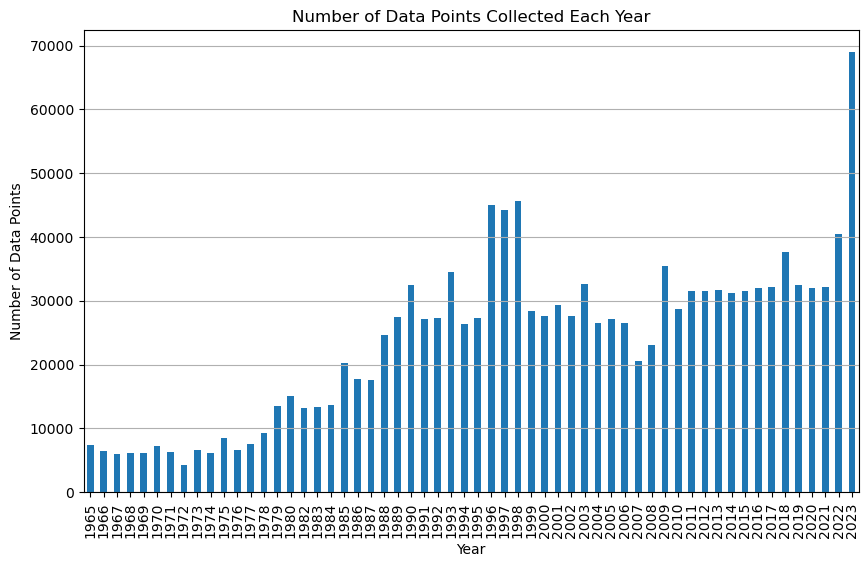

In [17]:
# plot time series of available data points per year
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df_xyz['year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points Collected Each Year')
plt.grid(axis='y')
plt.show()

In [18]:
# convert X, Y, Z to numeric (coerce bad values to NaN) before computing min/max
x = pd.to_numeric(df_xyz['X'], errors='coerce')
y = pd.to_numeric(df_xyz['Y'], errors='coerce')
z = pd.to_numeric(df_xyz['Z'], errors='coerce')
year = pd.to_numeric(df_xyz['year'], errors='coerce')

print(f"X: min={x.min()}, max={x.max()}, NaNs={x.isna().sum()}")
print(f"Y: min={y.min()}, max={y.max()}, NaNs={y.isna().sum()}")
print(f"Z: min={z.min()}, max={z.max()}, NaNs={z.isna().sum()}")
print(f"Year: min={int(year.min()) if pd.notna(year.min()) else None}, max={int(year.max()) if pd.notna(year.max()) else None}")

X: min=103755.72, max=119363.46, NaNs=0
Y: min=556933.41, max=580379.14, NaNs=0
Z: min=-17.6, max=23.48, NaNs=0
Year: min=1965, max=2023


## Visualize data

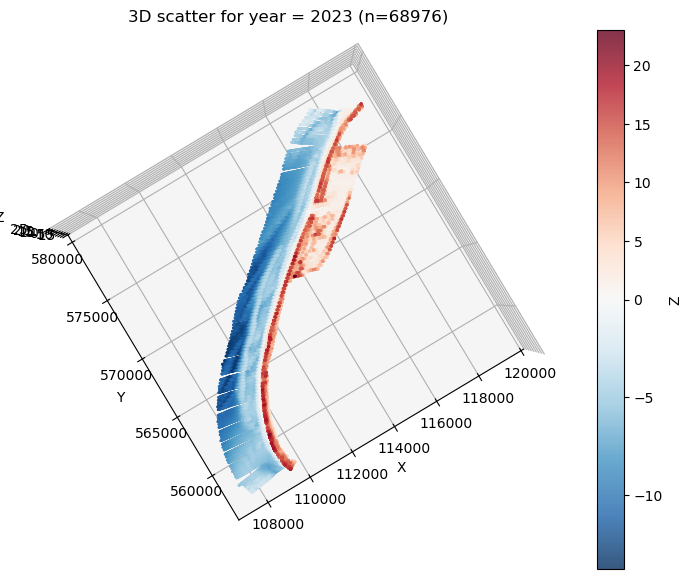

In [19]:
from matplotlib.colors import TwoSlopeNorm

# visualize data for year = xxxx

selected_year = 2023
sel_year = df_xyz[df_xyz['year'] == selected_year].copy()

max_points = 100000  # max points to plot

if sel_year.empty:
    print(f"No rows for year = {selected_year}")
else:
    # ensure numeric and drop bad rows
    sel_year[['X', 'Y', 'Z']] = sel_year[['X', 'Y', 'Z']].apply(pd.to_numeric, errors='coerce')
    sel_year = sel_year.dropna(subset=['X', 'Y', 'Z'])

    # downsample if too large
    if len(sel_year) > max_points:
        sel_year = sel_year.sample(max_points, random_state=1)

    # normalize with center at 0 so negatives map to red (left of center) and positives to blue
    z_vals = pd.to_numeric(sel_year['Z'], errors='coerce')
    norm = TwoSlopeNorm(vmin=z_vals.min(), vcenter=0, vmax=z_vals.max())
    cmap = plt.get_cmap('RdBu_r')  # reversed RdBu -> red for negative, blue for positive

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(sel_year['X'], sel_year['Y'], sel_year['Z'],
                    c=sel_year['Z'], cmap=cmap, norm=norm, s=1, alpha=0.8)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'3D scatter for year = {selected_year} (n={len(sel_year)})')
    fig.colorbar(sc, ax=ax, label='Z')

    # Rotate the view: elev=30, azim=90 rotates the plane by 90 degrees
    ax.view_init(elev=90, azim=-120)

    plt.show()


In [20]:
# Interactive 3D plot using Plotly
import plotly.express as px

selected_year = 2023
sel_year = df_xyz[df_xyz['year'] == selected_year].copy()

# use existing sel_year and max_points
if sel_year.empty:
    print(f"No rows for year = {selected_year}")
else:
    df_plot = sel_year.copy()
    # ensure numeric and drop bad rows
    df_plot[['X', 'Y', 'Z']] = df_plot[['X', 'Y', 'Z']].apply(pd.to_numeric, errors='coerce')
    df_plot = df_plot.dropna(subset=['X', 'Y', 'Z'])

    max_points = 30000  # limit for interactive plot

    # downsample if too large
    if len(df_plot) > max_points:
        df_plot = df_plot.sample(max_points, random_state=1)

    fig = px.scatter_3d(
        df_plot,
        x='X', y='Y', z='Z',
        color='Z',
        color_continuous_scale=[(0, 'red'), (0.5, 'white'), (1, 'blue')],
        color_continuous_midpoint=0,
        hover_data=['T', 'loc'],
        title=f'Interactive 3D scatter for year = {selected_year} (n={len(df_plot)})'
    )

    # ensure colorbar uses the data range (keeps midpoint at 0)
    fig.update_coloraxes(cmin=df_plot['Z'].min(), cmax=df_plot['Z'].max())
    fig.update_traces(marker=dict(size=2, opacity=0.8))
    fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
                      width=900, height=700)
    fig.show()


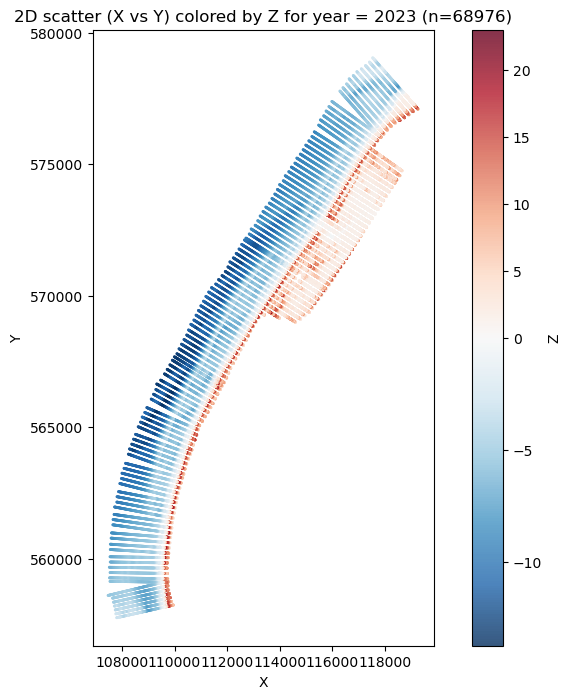

In [21]:
# 2D scatter of X vs Y colored by Z

selected_year = 2023
sel_year = df_xyz[df_xyz['year'] == selected_year].copy()

max_points = 100000  # max points to plot

if sel_year.empty:
    print(f"No rows for year = {selected_year}")
else:
    df2 = sel_year.copy()
    # ensure numeric and drop bad rows
    df2[['X', 'Y', 'Z']] = df2[['X', 'Y', 'Z']].apply(pd.to_numeric, errors='coerce')
    df2 = df2.dropna(subset=['X', 'Y', 'Z'])

    # downsample if too large
    if len(df2) > max_points:
        df2 = df2.sample(max_points, random_state=1)

    z_vals = df2['Z']
    norm2d = TwoSlopeNorm(vmin=z_vals.min(), vcenter=0, vmax=z_vals.max())

    fig2, ax2 = plt.subplots(figsize=(10, 8))
    sc2 = ax2.scatter(df2['X'], df2['Y'], c=z_vals, cmap=cmap, norm=norm2d,
                      s=1, alpha=0.8)
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title(f'2D scatter (X vs Y) colored by Z for year = {selected_year} (n={len(df2)})')
    ax2.set_aspect('equal', 'box')
    fig2.colorbar(sc2, ax=ax2, label='Z')
    plt.show()


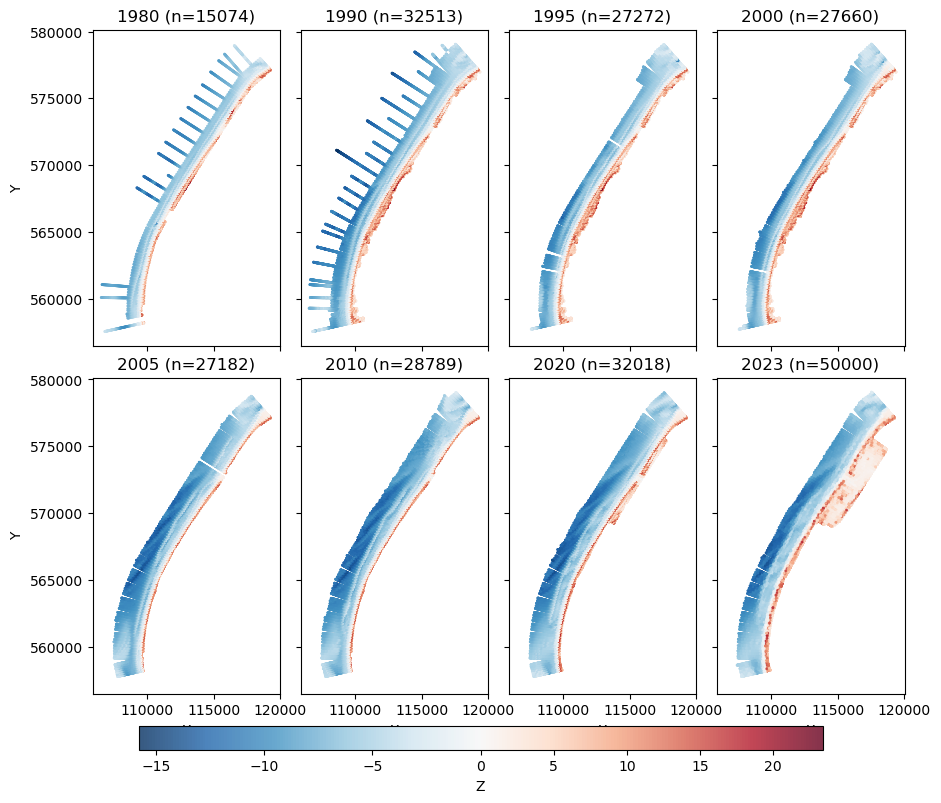

In [43]:
# 2x4 subplot for years [1965,1990,1995,2000,2005,2010,2020,2023]
years = [1980, 1990, 1995, 2000, 2005, 2010, 2020, 2023]
max_points = 50000

# compute global z range across selected years for consistent coloring
z_series = []
for y in years:
    tmp = df_xyz[df_xyz['year'] == y][['X', 'Y', 'Z']].copy()
    tmp[['X', 'Y', 'Z']] = tmp[['X', 'Y', 'Z']].apply(pd.to_numeric, errors='coerce')
    tmp = tmp.dropna(subset=['X', 'Y', 'Z'])
    if not tmp.empty:
        z_series.append(tmp['Z'])
if z_series:
    all_z_sel = pd.concat(z_series)
    zmin, zmax = all_z_sel.min(), all_z_sel.max()
else:
    zmin, zmax = -1, 1

norm = TwoSlopeNorm(vmin=zmin, vcenter=0, vmax=zmax)

fig, axes = plt.subplots(2, 4, figsize=(9, 8), sharex=True, sharey=True)
axes = axes.ravel()
sc = None

for i, year in enumerate(years):
    ax = axes[i]
    sel = df_xyz[df_xyz['year'] == year][['X', 'Y', 'Z', 'T', 'loc']].copy()
    sel[['X', 'Y', 'Z']] = sel[['X', 'Y', 'Z']].apply(pd.to_numeric, errors='coerce')
    sel = sel.dropna(subset=['X', 'Y', 'Z'])
    if sel.empty:
        ax.text(0.5, 0.5, f'No rows for {year}', ha='center', va='center')
        ax.set_title(f'{year} (n=0)')
        ax.set_xticks([])
        ax.set_yticks([])
        continue

    if len(sel) > max_points:
        sel = sel.sample(max_points, random_state=1)

    sc = ax.scatter(sel['X'], sel['Y'], c=sel['Z'], cmap=cmap, norm=norm, s=1, alpha=0.8)
    ax.set_title(f'{year} (n={len(sel)})')

    # only label axes on left column and bottom row
    if i % 4 == 0:
        ax.set_ylabel('Y')
    if i // 4 == 1:
        ax.set_xlabel('X')

    ax.set_aspect('equal', 'box')

# hide any unused axes (in case)
for j in range(len(years), len(axes)):
    axes[j].axis('off')

# make plots closer: reduce margins and spacing
plt.subplots_adjust(left=0.06, right=0.98, top=0.95, bottom=0.12, wspace=0.02, hspace=0.1)

# add a single horizontal colorbar at the bottom
if sc is not None:
    cax = fig.add_axes([0.12, 0.05, 0.76, 0.03])  # [left, bottom, width, height] in figure coords
    cb = fig.colorbar(sc, cax=cax, orientation='horizontal', label='Z')
    cb.ax.xaxis.set_ticks_position('bottom')

plt.show()


## Classify datapoints by depth (z)

In [38]:
# input intervals
intervals = [-5, 0, 5]

# ensure Z is numeric
df_xyz['Z'] = pd.to_numeric(df_xyz['Z'], errors='coerce')

# build bins and labels from the input intervals
bins = [-float('inf')] + intervals + [float('inf')]
labels = list(range(len(intervals) + 1))

# classify using pd.cut; right=False makes intervals left-inclusive ([a, b))
df_xyz['class'] = pd.cut(df_xyz['Z'], bins=bins, labels=labels, right=False, ordered=True)

# quick check
print(df_xyz['class'].value_counts(dropna=False))

class
0    525130
1    350221
3    256112
2    249220
Name: count, dtype: int64


In [39]:
df_xyz

('X', 'Y')          X          Y     Z         T   loc  year class
0           109682.41  558181.19  3.77  5-8-1965   900  1965     2
1           109677.53  558180.09  3.63  5-8-1965   900  1965     2
2           109672.65  558179.00  3.55  5-8-1965   900  1965     2
3           109667.77  558177.91  3.41  5-8-1965   900  1965     2
4           109662.89  558176.82  3.16  5-8-1965   900  1965     2
...               ...        ...   ...       ...   ...   ...   ...
1380678     117558.08  579018.26 -1.44  3-4-2023  3081  2023     1
1380679     117551.46  579025.77 -1.70  3-4-2023  3081  2023     1
1380680     117544.85  579033.27 -1.88  3-4-2023  3081  2023     1
1380681     117538.24  579040.77 -2.14  3-4-2023  3081  2023     1
1380682     117531.63  579048.27 -2.21  3-4-2023  3081  2023     1

[1380683 rows x 7 columns]

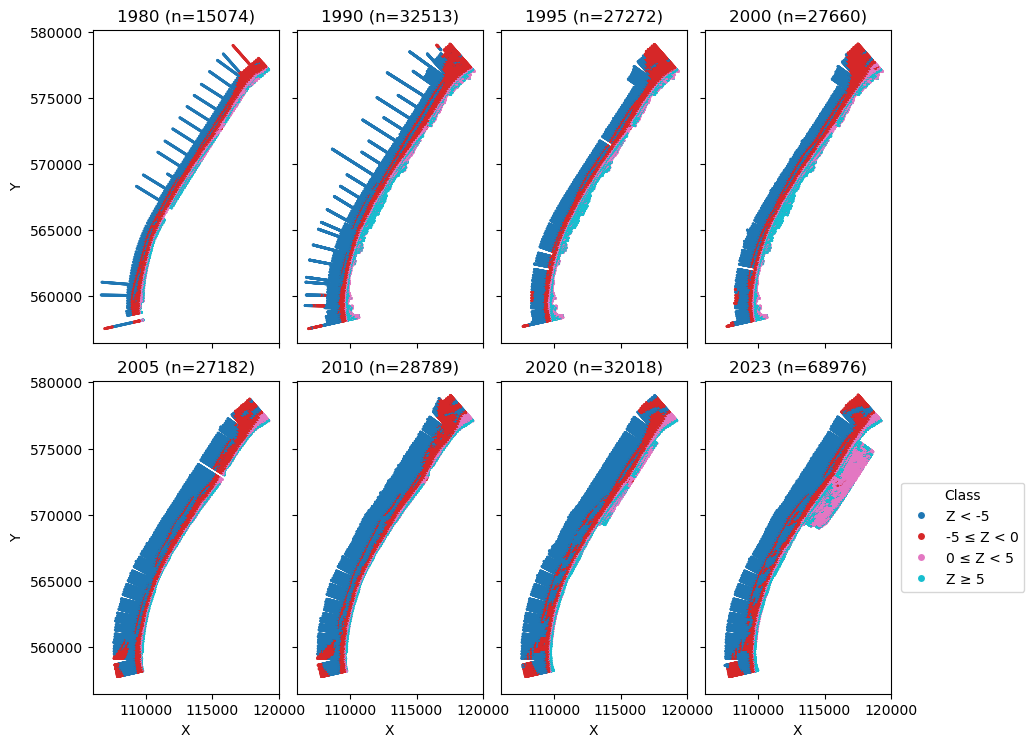

In [46]:
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

# 2x4 subplot colored by class (discrete) for years [1965,1990,1995,2000,2005,2010,2020,2023]
years_plot = [1980, 1990, 1995, 2000, 2005, 2010, 2020, 2023]

# ensure class exists and is categorical
if 'class' not in df_xyz.columns:
    raise RuntimeError("df_xyz has no 'class' column. Run classification cell first.")

n_classes = int(df_xyz['class'].nunique())
cmap_disc = plt.get_cmap('tab10', max(n_classes, 1))

fig, axes = plt.subplots(2, 4, figsize=(9, 8), sharex=True, sharey=True)
axes = axes.ravel()

sc = None
for i, yr in enumerate(years_plot):
    ax = axes[i]
    sel = df_xyz[df_xyz['year'] == yr][['X', 'Y', 'class']].copy()
    if sel.empty:
        ax.text(0.5, 0.5, f'No rows for {yr}', ha='center', va='center')
        ax.set_title(f'{yr} (n=0)')
        ax.set_xticks([])
        ax.set_yticks([])
        continue

    # ensure numeric coordinates and drop bad rows
    sel[['X', 'Y']] = sel[['X', 'Y']].apply(pd.to_numeric, errors='coerce')
    sel = sel.dropna(subset=['X', 'Y', 'class'])
    if sel.empty:
        ax.text(0.5, 0.5, f'No valid XY for {yr}', ha='center', va='center')
        ax.set_title(f'{yr} (n=0)')
        ax.set_xticks([])
        ax.set_yticks([])
        continue

    # convert class to integer codes for discrete colormap
    # use isinstance on the dtype to avoid deprecated is_categorical_dtype
    if isinstance(sel['class'].dtype, pd.CategoricalDtype):
        class_codes = sel['class'].cat.codes
    else:
        # safe fallback: create categorical and get codes
        class_codes = pd.Categorical(sel['class']).codes

    sc = ax.scatter(sel['X'], sel['Y'], c=class_codes, cmap=cmap_disc,
                    vmin=0, vmax=max(n_classes-1, 0), s=1, alpha=0.9)
    ax.set_title(f'{yr} (n={len(sel)})')
    if i % 4 == 0:
        ax.set_ylabel('Y')
    if i // 4 == 1:
        ax.set_xlabel('X')
    ax.set_aspect('equal', 'box')

# hide any unused axes (if any)
for j in range(len(years_plot), len(axes)):
    axes[j].axis('off')

plt.subplots_adjust(left=0.06, right=0.95, top=0.93, bottom=0.10, wspace=0.08, hspace=0.12)

# build legend from bins (if present) else generic class labels
legend_labels = []
if 'bins' in globals() and isinstance(bins, (list, tuple)) and len(bins) >= n_classes+1:
    for idx in range(n_classes):
        lo = bins[idx]
        hi = bins[idx+1]
        if lo == -float('inf'):
            lab = f'Z < {hi}'
        elif hi == float('inf'):
            lab = f'Z ≥ {lo}'
        else:
            lab = f'{lo} ≤ Z < {hi}'
        legend_labels.append(lab)
else:
    legend_labels = [f'class {i}' for i in range(n_classes)]

# create legend handles
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap_disc(i),
                  markersize=6, label=legend_labels[i]) for i in range(n_classes)]

# place legend on the right
axes[-1].legend(handles=handles, title='Class', bbox_to_anchor=(1.02, 0.5), loc='center left')

plt.show()

In [49]:
# df_xyz: show all rows with year = 2023 and loc = 900
df_xyz[(df_xyz['year'] == 2019) & (df_xyz['loc'] == 900)]

('X', 'Y')          X          Y     Z          T  loc  year class
1174493     109950.79  558241.18  6.59  20-1-2019  900  2019     3
1174494     109945.91  558240.08  6.51  20-1-2019  900  2019     3
1174495     109941.03  558238.99  6.68  20-1-2019  900  2019     3
1174496     109936.15   558237.9  7.13  20-1-2019  900  2019     3
1174497     109931.27  558236.81  6.93  20-1-2019  900  2019     3
...               ...        ...   ...        ...  ...   ...   ...
1174752     107847.68  557771.08 -2.82  20-1-2019  900  2019     1
1174753     107837.93  557768.89 -2.89  20-1-2019  900  2019     1
1174754     107828.17  557766.71 -3.12  20-1-2019  900  2019     1
1174755     107818.41  557764.53 -3.43  20-1-2019  900  2019     1
1174756     107808.65  557762.35 -3.59  20-1-2019  900  2019     1

[264 rows x 7 columns]

In [50]:
df_xyz[(df_xyz['year'] == 2020) & (df_xyz['loc'] == 900)]

('X', 'Y')          X          Y     Z         T  loc  year class
1206911     109945.91  558240.08  6.43  7-3-2020  900  2020     3
1206912     109941.03  558238.99  6.60  7-3-2020  900  2020     3
1206913     109936.15   558237.9  7.09  7-3-2020  900  2020     3
1206914     109931.27  558236.81  6.96  7-3-2020  900  2020     3
1206915     109926.39  558235.72  6.48  7-3-2020  900  2020     3
...               ...        ...   ...       ...  ...   ...   ...
1207165     107857.44  557773.26 -3.27  7-3-2020  900  2020     1
1207166     107847.68  557771.08 -3.57  7-3-2020  900  2020     1
1207167     107837.93  557768.89 -3.53  7-3-2020  900  2020     1
1207168     107828.17  557766.71 -3.77  7-3-2020  900  2020     1
1207169     107818.41  557764.53 -3.65  7-3-2020  900  2020     1

[259 rows x 7 columns]

In [53]:
# crop df_xyz to the given bounding box (uses existing xmin, xmax, ymin, ymax)

xmin=114354.34
xmax=115354.34
ymin=570569.77
ymax=571569.77

df_crop = df_xyz.copy()
df_crop[['X', 'Y']] = df_crop[['X', 'Y']].apply(pd.to_numeric, errors='coerce')
df_crop = df_crop.dropna(subset=['X', 'Y'])

df_crop = df_crop[(df_crop['X'] >= xmin) & (df_crop['X'] <= xmax) &
                  (df_crop['Y'] >= ymin) & (df_crop['Y'] <= ymax)]

print(f"Cropped rows: {len(df_crop)}")
print(f"Z: mean={df_crop['Z'].mean():.3f}, median={df_crop['Z'].median():.3f}")
df_crop.head()


Cropped rows: 25005
Z: mean=4.652, median=4.070


('X', 'Y')          X          Y     Z         T   loc  year class
2723        114377.68  571029.30  5.03  5-8-1965  2291  1965     3
2724        114373.46  571031.98  5.43  5-8-1965  2291  1965     3
2725        114369.24  571034.66  6.02  5-8-1965  2291  1965     3
2726        114365.02  571037.34  6.22  5-8-1965  2291  1965     3
2727        114360.79  571040.02  6.33  5-8-1965  2291  1965     3

In [60]:
# Define three boxes (approx ranges provided) and summarize points inside each.
# Uses existing df_xyz, mpatches, and ax2 from the notebook.

boxes = {
    "Box 1 (bottom)": {"xmin": 109000, "xmax": 110000, "ymin": 562500, "ymax": 565000},
    "Box 2 (middle)": {"xmin": 110000, "xmax": 112000, "ymin": 571500, "ymax": 576500},
    "Box 3 (top)":    {"xmin": 112000, "xmax": 114000, "ymin": 576500, "ymax": 580000},
}

summaries = []

# ensure numeric coordinates in df_xyz for reliable filtering (doesn't overwrite originals)
df_num = df_xyz.copy()
df_num[['X', 'Y', 'Z']] = df_num[['X', 'Y', 'Z']].apply(pd.to_numeric, errors='coerce')

for name, b in boxes.items():
    sel_box = df_num[
        (df_num['X'] >= b['xmin']) & (df_num['X'] <= b['xmax']) &
        (df_num['Y'] >= b['ymin']) & (df_num['Y'] <= b['ymax'])
    ].dropna(subset=['X', 'Y', 'Z']).copy()

    n = len(sel_box)
    mean_z = sel_box['Z'].mean() if n > 0 else float('nan')
    med_z = sel_box['Z'].median() if n > 0 else float('nan')
    zmin_box = sel_box['Z'].min() if n > 0 else float('nan')
    zmax_box = sel_box['Z'].max() if n > 0 else float('nan')
    class_counts = sel_box['class'].value_counts().to_dict() if 'class' in sel_box.columns else {}

    summaries.append({
        "box": name,
        "n": n,
        "mean_z": mean_z,
        "median_z": med_z,
        "zmin": zmin_box,
        "zmax": zmax_box,
        "class_counts": class_counts
    })

    # draw rectangle and annotate on ax2 if it exists (2D scatter axis)
    try:
        width = b['xmax'] - b['xmin']
        height = b['ymax'] - b['ymin']
        rect = mpatches.Rectangle((b['xmin'], b['ymin']), width, height,
                                  fill=False, edgecolor='yellow', linewidth=1.5)
        ax2.add_patch(rect)
        txt = f"{name}\nn={n}\nmean Z={mean_z:.2f}\nmed Z={med_z:.2f}"
        # place annotation slightly above the top-left corner of the rectangle
        ax2.text(b['xmin'] + 10, b['ymax'] + (height * 0.01), txt, color='yellow',
                 fontsize=8, va='bottom', ha='left', bbox=dict(facecolor='black', alpha=0.5, pad=2))
    except Exception:
        # if ax2 is not available or drawing fails, skip plotting
        pass

# show summary table and save to CSV
summary_df = pd.DataFrame(summaries).astype({"n": "int64"})
print(summary_df[['box', 'n', 'mean_z', 'median_z', 'zmin', 'zmax', 'class_counts']])

# save CSV (optional)
summary_df.to_csv('data/box_summaries.csv', index=False)

              box      n     mean_z  median_z   zmin   zmax  \
0  Box 1 (bottom)  48428  -6.406219     -6.54 -12.49  12.03   
1  Box 2 (middle)   1607 -11.886615    -11.12 -16.50  -8.91   
2     Box 3 (top)    412 -14.102670    -13.90 -17.10 -11.80   

                            class_counts  
0  {0: 34074, 1: 12713, 2: 1518, 3: 123}  
1            {0: 1607, 1: 0, 2: 0, 3: 0}  
2             {0: 412, 1: 0, 2: 0, 3: 0}  


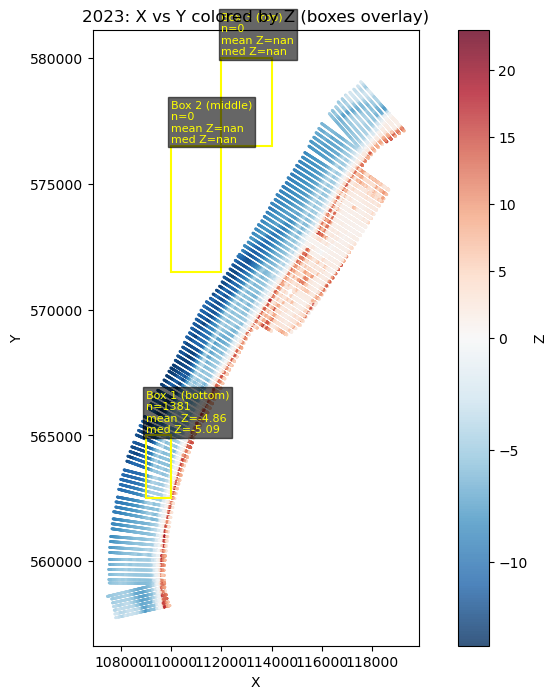

In [61]:
# 2D scatter of 2023 with the three boxes overlaid (color by Z)
df_sel = df_xyz[df_xyz['year'] == 2023].copy()
df_sel[['X', 'Y', 'Z']] = df_sel[['X', 'Y', 'Z']].apply(pd.to_numeric, errors='coerce')
df_sel = df_sel.dropna(subset=['X', 'Y', 'Z'])

max_points = 100000
plot_df = df_sel.sample(n=min(len(df_sel), max_points), random_state=1)

fig, ax = plt.subplots(figsize=(10, 8))
sc = ax.scatter(plot_df['X'], plot_df['Y'], c=plot_df['Z'], cmap=cmap, norm=norm2d, s=1, alpha=0.8)

# draw boxes and annotate per-box stats (computed from full 2023 data, not the downsampled plot)
for name, b in boxes.items():
    width = b['xmax'] - b['xmin']
    height = b['ymax'] - b['ymin']
    rect = mpatches.Rectangle((b['xmin'], b['ymin']), width, height,
                              fill=False, edgecolor='yellow', linewidth=1.5)
    ax.add_patch(rect)

    sel_box = df_sel[
        (df_sel['X'] >= b['xmin']) & (df_sel['X'] <= b['xmax']) &
        (df_sel['Y'] >= b['ymin']) & (df_sel['Y'] <= b['ymax'])
    ]
    n = len(sel_box)
    mean_z = sel_box['Z'].mean() if n > 0 else float('nan')
    med_z = sel_box['Z'].median() if n > 0 else float('nan')

    txt = f"{name}\nn={n}\nmean Z={mean_z:.2f}\nmed Z={med_z:.2f}"
    ax.text(b['xmin'] + 5, b['ymax'] + (height * 0.01), txt,
            color='yellow', fontsize=8, va='bottom', ha='left',
            bbox=dict(facecolor='black', alpha=0.6, pad=2))

ax.set_title('2023: X vs Y colored by Z (boxes overlay)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal', 'box')
fig.colorbar(sc, ax=ax, label='Z')
plt.show()

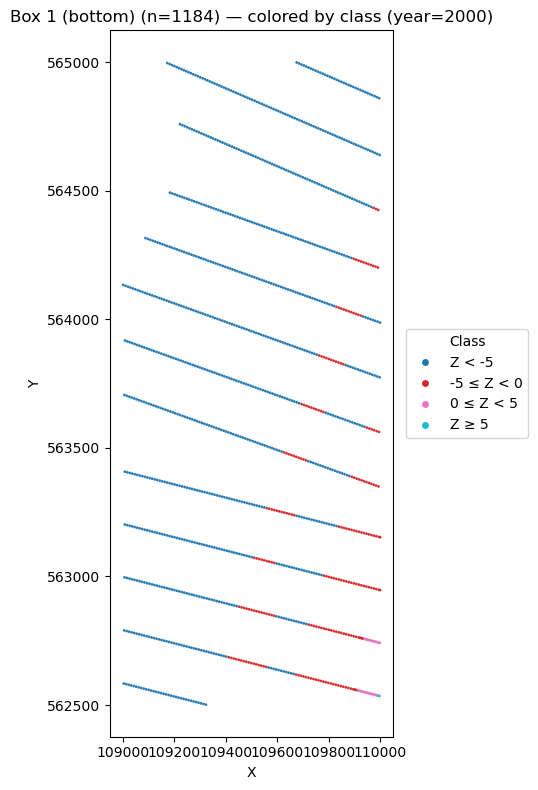

In [66]:
# Visualize Box 1 (bottom) colored by 'class' for year = 2023
box_name = "Box 1 (bottom)"
b = boxes[box_name]

selected_year = 2000

sel_box = df_num[
    (df_num['X'] >= b['xmin']) & (df_num['X'] <= b['xmax']) &
    (df_num['Y'] >= b['ymin']) & (df_num['Y'] <= b['ymax']) &
    (df_num['year'] == selected_year)
].dropna(subset=['X', 'Y', 'class']).copy()

if sel_box.empty:
    print(f"No points found in {box_name} for year = {selected_year}")
else:
    # integer codes for the categorical 'class'
    if isinstance(sel_box['class'].dtype, pd.CategoricalDtype):
        class_codes = sel_box['class'].cat.codes
    else:
        class_codes = pd.Categorical(sel_box['class']).codes

    fig, ax = plt.subplots(figsize=(8, 8))
    sc = ax.scatter(
        sel_box['X'], sel_box['Y'],
        c=class_codes, cmap=cmap_disc, vmin=0, vmax=max(n_classes - 1, 0),
        s=1, alpha=0.9
    )

    ax.set_title(f"{box_name} (n={len(sel_box)}) — colored by class (year={selected_year})")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_aspect('equal', 'box')

    # build discrete legend from existing legend_labels
    handles = [
        Line2D([0], [0], marker='o', color='w',
               markerfacecolor=cmap_disc(i), markersize=6, label=legend_labels[i])
        for i in range(n_classes)
    ]
    ax.legend(handles=handles, title='Class', bbox_to_anchor=(1.02, 0.5), loc='center left')

    plt.tight_layout()
    plt.show()